In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from tqdm.notebook import tqdm

In [3]:
RAW_DATA_DIR = "../../data/raw/"
dataset = pd.read_csv(RAW_DATA_DIR + 'filtered.tsv', sep='\t', index_col=0)

In [5]:
print(f"Mean simmilarity of the text paris - {dataset['similarity'].mean()}")
print(f"Mean length difference of the text paris - {dataset['lenght_diff'].mean()}")
print(f"Mean reference toxisity - {dataset['ref_tox'].mean()}")
print(f"Mean translation toxisity - {dataset['trn_tox'].mean()}")

Mean simmilarity of the text paris - 0.7584692006374207
Mean length difference of the text paris - 0.15765231074368755
Mean reference toxisity - 0.5413717990275281
Mean translation toxisity - 0.4344898352213311


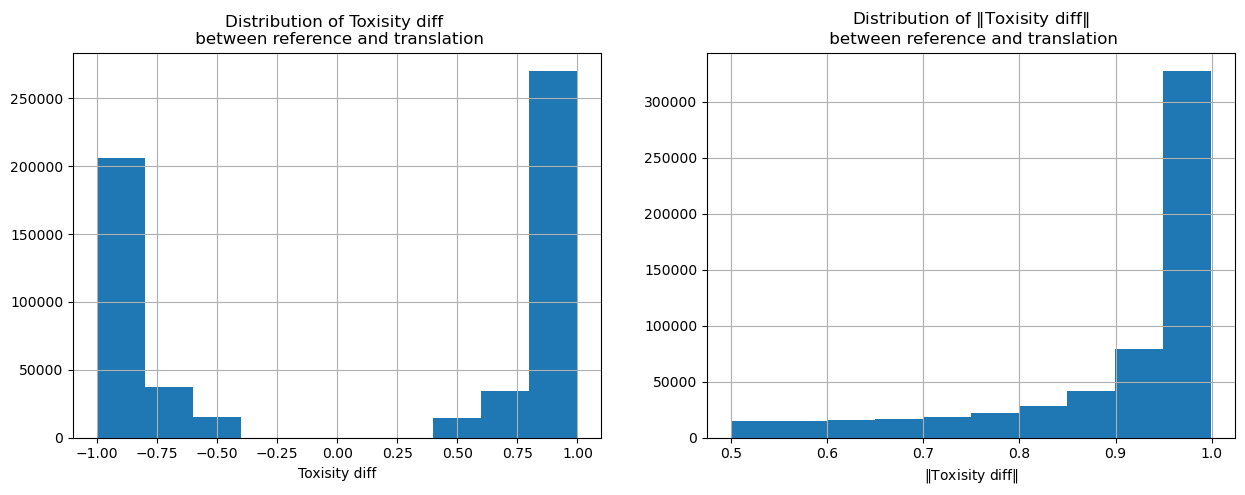

In [6]:
dataset['tox_diff'] = dataset.ref_tox - dataset.trn_tox
dataset['tox_diff_abs'] = np.abs(dataset.ref_tox - dataset.trn_tox)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].hist(dataset['tox_diff'])
axes[0].grid()
axes[0].set_xlabel('Toxisity diff')
axes[0].set_title('Distribution of Toxisity diff \n between reference and translation')
axes[1].hist(dataset['tox_diff_abs'])
axes[1].grid()
axes[1].set_xlabel('$\|$Toxisity diff$\|$')
axes[1].set_title('Distribution of $\|$Toxisity diff$\|$ \n between reference and translation')
plt.savefig('Toxisity_dist.svg')

In [7]:
dataset['reference_words'] = dataset.apply(lambda x: len(x['reference'].split()), axis=1)
dataset['translation_words'] = dataset.apply(lambda x: len(x['translation'].split()), axis=1)

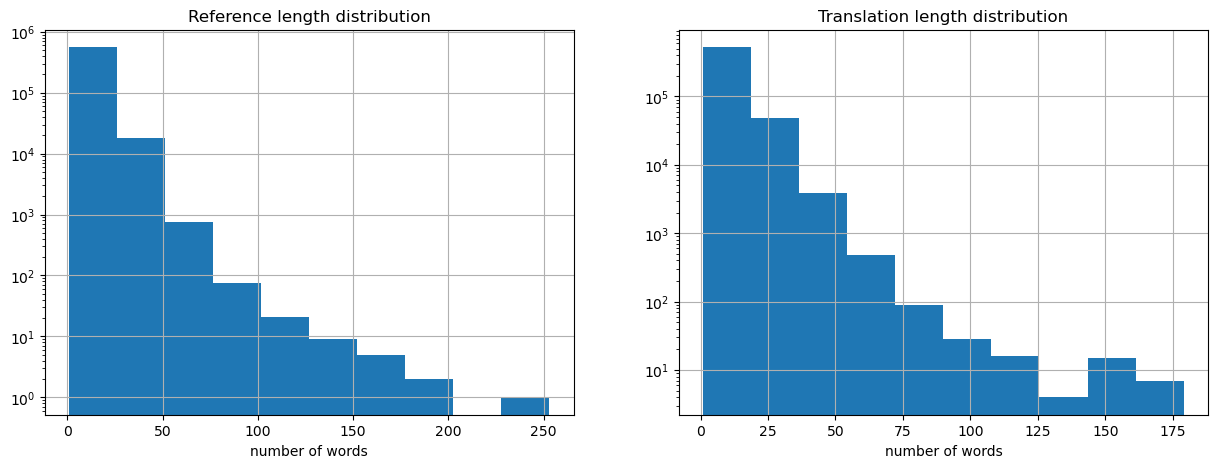

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(dataset['reference_words'])
axes[0].set_yscale('log')
axes[0].grid()
axes[0].set_xlabel('number of words')
axes[0].set_title('Reference length distribution')

axes[1].hist(dataset['translation_words'])
axes[1].set_yscale('log')
axes[1].grid()
axes[1].set_xlabel('number of words')
axes[1].set_title('Translation length distribution')
plt.show()

In [9]:
detoxification_samples = dataset[dataset['ref_tox'] >= dataset['trn_tox']]
toxification_samples = dataset[dataset['ref_tox'] < dataset['trn_tox']]

In [10]:
print(f'{len(detoxification_samples) / len(dataset)*100:.3f}% of samples in the initial dataset is text detoxification')
print(f'{len(toxification_samples) / len(dataset)*100:.3f}% of samples in the initial dataset is text toxification')

55.236% of samples in the initial dataset is text detoxification
44.764% of samples in the initial dataset is text toxification


In [11]:
print(f"Mean reference toxisity in detox - {detoxification_samples['ref_tox'].mean()}")
print(f"Mean translation toxisity in detox - {detoxification_samples['trn_tox'].mean()}")

Mean reference toxisity - 0.9447821251298479
Mean translation toxisity - 0.029131700547454394


In [12]:
print(f"Mean reference toxisity in toxification - {toxification_samples['ref_tox'].mean()}")
print(f"Mean translation toxisity in toxification - {toxification_samples['trn_tox'].mean()}")

Mean reference toxisity in toxification - 0.043584653850167875
Mean translation toxisity in toxification - 0.9346804738282111


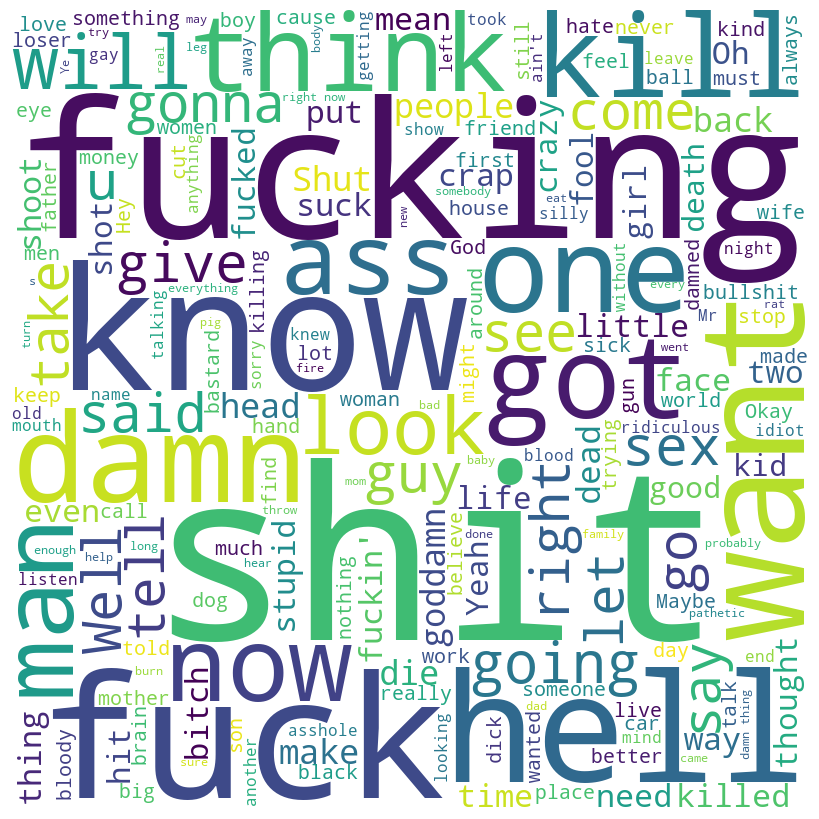

In [13]:
comment_words = ' '.join(detoxification_samples['reference'])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('Toxic_wordCloud.svg')

In [14]:
T5_res_path = '../../notebooks/test_set_results/T5_paraphrased_resV2.csv'
test_data = pd.read_csv(T5_res_path)
test_data.head()

,Unnamed: 0,en_toxic_comment,en_neutral_comment,T5_paraphrased,initial_toxicity,ideal_toxicity,resulting_toxicity,reference2masked_sim,reference2translation_sim,Fluency_scores
0,0,he had steel balls too !,he was brave too!,He had steel balls too!,0.912212,0.005482,0.917721,1.000000,0.510213,0.900897
1,1,"dude should have been taken to api , he would ...",It would have been good if he went to api. He ...,"The guy should have been taken to the api, he'...",0.744653,0.006850,0.783338,0.912686,0.557020,0.866171
2,2,"im not gonna sell the fucking picture , i just...","I'm not gonna sell the picture, i just want to...","I'm not gonna sell the picture, I just want to...",0.919632,0.005215,0.005073,0.887211,0.887211,0.894954
3,3,the garbage that is being created by cnn and o...,the news that is being created by cnn and othe...,The garbage being created by CNN and other new...,0.955578,0.014164,0.964304,0.804467,0.912075,0.886835
4,4,the reason they dont exist is because neither ...,The reason they don't exist is because neither...,The reason they don't exist is that neither is...,0.945480,0.108274,0.936731,0.992926,0.895799,0.654566


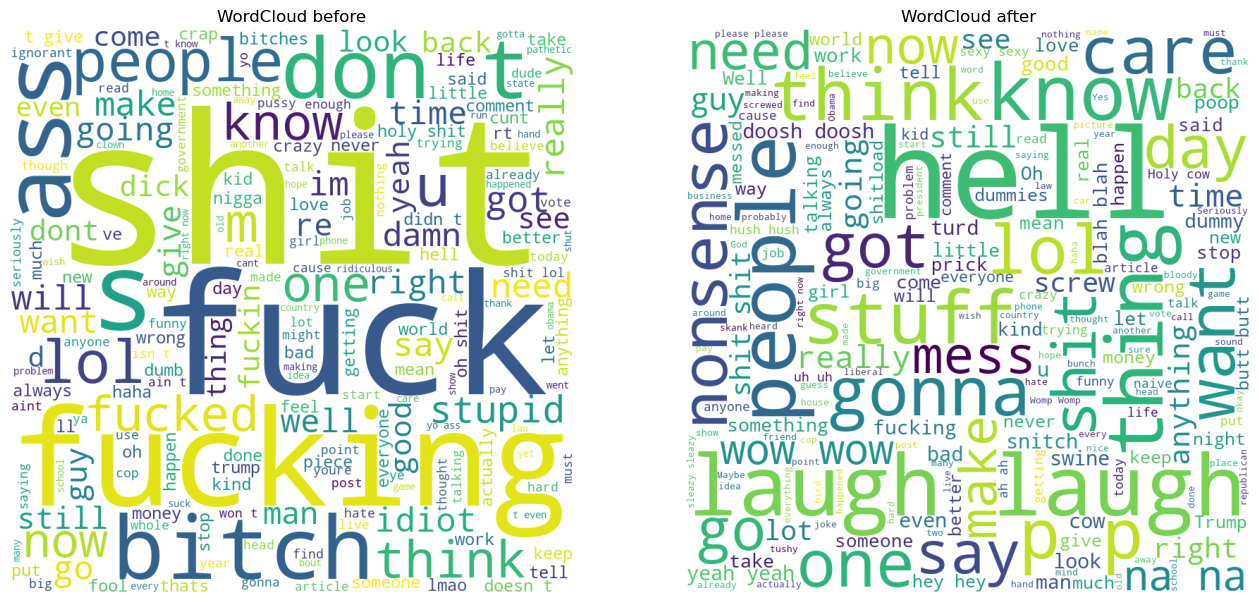

In [20]:
comment_words_before = ' '.join(test_data['en_toxic_comment'])
comment_words_after = ' '.join(test_data['T5_paraphrased'])

stopwords = set(STOPWORDS)

wordcloud_before = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words_before)

wordcloud_after = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words_after)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
# plot the WordCloud image
axes[0].imshow(wordcloud_before)
axes[0].axis("off")
axes[0].set_title('WordCloud before')

axes[1].imshow(wordcloud_after)
axes[1].axis("off")
axes[1].set_title('WordCloud after')

plt.savefig('WordClouds_compare_testset.svg')